# Perceptron implementation with example.

First we import the necessary libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Plot of 2 random blops/cluster.

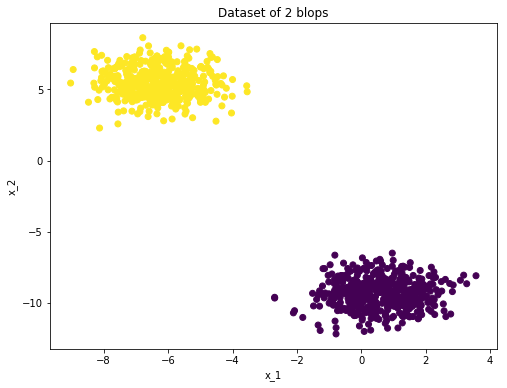

In [3]:
np.random.seed(127)
X, y = make_blobs(n_samples=1000, centers=2)
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Dataset of 2 blops")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

Implementation of the Perceptron class.

In [4]:
class Perceptron:
    def __init__(self):
        pass

    def heavyside(self, x):
        return np.array([1 if elem >= 0 else 0 for elem in x])[:, np.newaxis]

    def train(self, X, y, learningrate=0.1, n_iterations=100):
        y = np.array([y])
        y = y.T
        n_samples, n_features = X.shape
        self.W = np.zeros((n_features, 1))
        self.b = 0
        for iter in range(n_iterations):
            a = np.dot(X, self.W)+self.b
            prediction = self.heavyside(np.dot(X, self.W)+self.b)
            grad_W = np.dot(X.T, prediction - y)
            grad_b = np.sum(prediction - y)
            self.W = self.W - learningrate * grad_W
            self.b = self.b - learningrate * grad_b
        return self.W, self.b

Training.

In [5]:
p = Perceptron()
p.heavyside(np.random.randn(5,1))
weights, bias = p.train(X, y, learningrate=0.1, n_iterations=400)

Plot of the decision hyperplane.

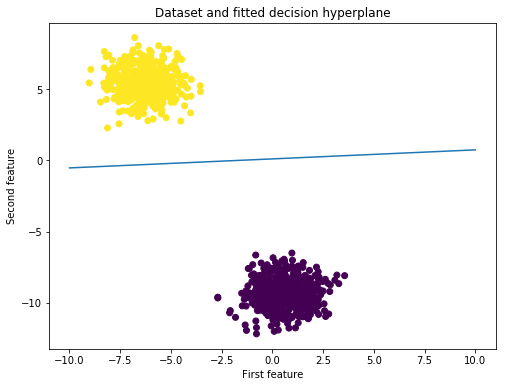

In [6]:
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()